In [1]:
# importing numpy, pandas & matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

In [6]:
print('X.shape =', X.shape)
print('y.shape =', y.shape)

X.shape = (506, 13)
y.shape = (506,)


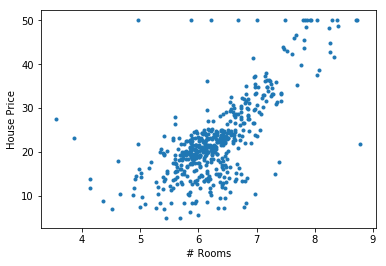

In [7]:
plt.scatter(X.RM, y, marker='.');
plt.xlabel('# Rooms');
plt.ylabel('House Price');

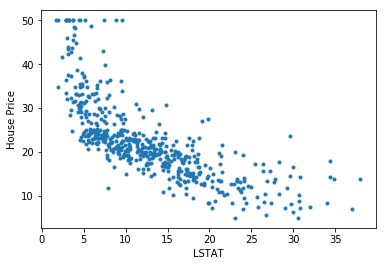

In [8]:
plt.scatter(X.LSTAT, y, marker='.');
plt.xlabel('LSTAT');
plt.ylabel('House Price');

### Train/Test Split

- In order to reguralize the model, we split the dataset into **training** and **test** sets.
- Training and test sets are similar in shape except in size.
- Usually training set is the bigger part of the dataset (e.g. 80%) and the rest is test set (e.g. 20%).

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [10]:
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)
print('y_train.shape =', y_train.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (404, 13)
X_test.shape = (102, 13)
y_train.shape = (404,)
y_test.shape = (102,)


### Feature Scaling

In [20]:
y_test


162    50.0
403     8.3
208    24.4
145    13.8
404     8.5
319    21.0
64     33.0
93     25.0
438     8.4
345    17.5
346    17.2
382    11.3
65     23.5
372    50.0
79     20.3
205    22.6
289    24.8
293    23.9
444    10.8
48     14.4
286    20.1
466    19.0
117    19.2
268    43.5
149    15.4
12     21.7
148    17.8
216    23.3
276    33.2
273    35.2
       ... 
163    50.0
156    13.1
4      36.2
454    14.9
132    23.0
72     22.8
343    23.9
104    20.1
277    33.1
8      16.5
213    28.1
6      22.9
448    14.1
335    21.1
381    10.9
331    17.1
248    24.5
39     30.8
463    20.2
253    42.8
94     20.6
133    18.4
374    13.8
169    22.3
363    16.8
502    20.6
474    13.8
125    21.4
77     20.8
254    21.9
Length: 102, dtype: float64

In [13]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)


### training model on training set

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
print('Mean squared error =', mean_squared_error(y_test, y_pred))

Mean squared error = 25.84247427560068


In [17]:
print('Linear Regression score = %.2f%%' % (model.score(X_test, y_test) * 100))

Linear Regression score = 71.63%


In [18]:
model.coef_

array([-0.72570473,  1.37146339,  0.33674968,  0.41763044, -2.33885194,
        2.12222184,  0.00921218, -3.60047828,  2.68615239, -2.22555839,
       -1.99087218,  0.88717999, -4.18756825])

In [17]:
model.intercept_

4.1659889657549334e-15